# All the information is on the task(master fan wiki)

In this notebook we try to use Python's BeautifulSoup module to scrape the wording of all the tasks from series 14 of the popular TV show Taskmaster from the fan wiki:

https://taskmaster.fandom.com/wiki/Series_1

with a view to analysing them.

## The main tasks

In [1]:
# Ususal uploads

from bs4 import BeautifulSoup
import requests
import numpy as np

from wordcloud import WordCloud
import plotly.express as px
from pprint import pprint
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import pandas as pd

In [2]:
url = 'https://taskmaster.fandom.com/wiki/Series_1'

In [3]:
page = requests.get(url)

In [4]:
soup = BeautifulSoup(page.text, 'html.parser')

In [5]:
all_starts = list(soup.find_all("tr", class_='tmtablerow'))
len(all_starts)

37

In [6]:
#Putting them all in a single list

all_tasks = []
for i in range(len(all_starts)):
    if len(list(all_starts[i])) > 2:
        all_tasks.append(str(list(all_starts[i])[3]))
    else:
        all_tasks.append(str(list(all_starts[i])[1]))
    
            
pprint(all_tasks)

['<td><b>Prize:</b> Most unusual item.\n</td>',
 '<td>In the lab, there is a watermelon. Eat as much watermelon as possible.\n'
 '</td>',
 '<td>Paint the best picture of a horse whilst riding a horse.\n</td>',
 '<td>Completely empty this bathtub. You must not remove the plug, tip or '
 'damage the bath.\n'
 '</td>',
 '<td><b>Live:</b> Pop up a tent. Get in the tent. Zip up the tent. Pop on a '
 'onesie in the tent. And emerge from the tent wearing the onesie.\n'
 '</td>',
 '<td>Find Alex.\n</td>',
 '<td><b>Prize:</b> Most impressive item.\n</td>',
 '<td>High-five a 55-year-old.\n</td>',
 '<td>Identify the contents of these pies. You may touch the pies, but may not '
 'breach their pastry.\n'
 '</td>',
 '<td>Do something that will look impressive in reverse. The Taskmaster will '
 'see whatever act you perform played backwards. You must therefore do '
 'something backwards that will look impressive when the footage is played in '
 'reverse.\n'
 '</td>',
 '<td><b>Live:</b> Crack the code

In [7]:
# Getting rid of the <td>s from the beinnings 

all_tasks = [task[4:] for task in all_tasks]
all_tasks

['<b>Prize:</b> Most unusual item.\n</td>',
 'In the lab, there is a watermelon. Eat as much watermelon as possible.\n</td>',
 'Paint the best picture of a horse whilst riding a horse.\n</td>',
 'Completely empty this bathtub. You must not remove the plug, tip or damage the bath.\n</td>',
 '<b>Live:</b> Pop up a tent. Get in the tent. Zip up the tent. Pop on a onesie in the tent. And emerge from the tent wearing the onesie.\n</td>',
 'Find Alex.\n</td>',
 '<b>Prize:</b> Most impressive item.\n</td>',
 'High-five a 55-year-old.\n</td>',
 'Identify the contents of these pies. You may touch the pies, but may not breach their pastry.\n</td>',
 'Do something that will look impressive in reverse. The Taskmaster will see whatever act you perform played backwards. You must therefore do something backwards that will look impressive when the footage is played in reverse.\n</td>',
 '<b>Live:</b> Crack the code, unshackle yourself and sprint 1 metre.\n</td>',
 '<b>Prize:</b> Most meaningful item.\

In [8]:
#Remove the stuff from the beginnings

for i in range(len(all_tasks)):
    if 'Prize:' in all_tasks[i]:
        all_tasks[i] = all_tasks[i][14:]
    if 'Team Live' in all_tasks[i]:
        all_tasks[i] = all_tasks[i][18:]
    if 'Team' in all_tasks[i]:
        all_tasks[i] = all_tasks[i][13:]
    if 'Live' in all_tasks[i]:
        all_tasks[i] = all_tasks[i][13:]
        
all_tasks

['Most unusual item.\n</td>',
 'In the lab, there is a watermelon. Eat as much watermelon as possible.\n</td>',
 'Paint the best picture of a horse whilst riding a horse.\n</td>',
 'Completely empty this bathtub. You must not remove the plug, tip or damage the bath.\n</td>',
 'Pop up a tent. Get in the tent. Zip up the tent. Pop on a onesie in the tent. And emerge from the tent wearing the onesie.\n</td>',
 'Find Alex.\n</td>',
 'Most impressive item.\n</td>',
 'High-five a 55-year-old.\n</td>',
 'Identify the contents of these pies. You may touch the pies, but may not breach their pastry.\n</td>',
 'Do something that will look impressive in reverse. The Taskmaster will see whatever act you perform played backwards. You must therefore do something backwards that will look impressive when the footage is played in reverse.\n</td>',
 'Crack the code, unshackle yourself and sprint 1 metre.\n</td>',
 'Most meaningful item.\n</td>',
 'Throw a teabag into a mug from the farthest distance.\n</

In [9]:
# Removing the stuff from the end

all_tasks = [task[:-7] for task in all_tasks]
all_tasks

['Most unusual item',
 'In the lab, there is a watermelon. Eat as much watermelon as possible',
 'Paint the best picture of a horse whilst riding a horse',
 'Completely empty this bathtub. You must not remove the plug, tip or damage the bath',
 'Pop up a tent. Get in the tent. Zip up the tent. Pop on a onesie in the tent. And emerge from the tent wearing the onesie',
 'Find Alex',
 'Most impressive item',
 'High-five a 55-year-old',
 'Identify the contents of these pies. You may touch the pies, but may not breach their pastry',
 'Do something that will look impressive in reverse. The Taskmaster will see whatever act you perform played backwards. You must therefore do something backwards that will look impressive when the footage is played in reverse',
 'Crack the code, unshackle yourself and sprint 1 metre',
 'Most meaningful item',
 'Throw a teabag into a mug from the farthest distance',
 'Using this device to track your route, create the best image for the Taskmaster. Pop a balloon t

## NLP

In [51]:
tasks_split = [task.split() for task in all_tasks]
pprint(tasks_split)

[['Most', 'unusual', 'item'],
 ['In',
  'the',
  'lab,',
  'there',
  'is',
  'a',
  'watermelon.',
  'Eat',
  'as',
  'much',
  'watermelon',
  'as',
  'possible'],
 ['Paint',
  'the',
  'best',
  'picture',
  'of',
  'a',
  'horse',
  'whilst',
  'riding',
  'a',
  'horse'],
 ['Completely',
  'empty',
  'this',
  'bathtub.',
  'You',
  'must',
  'not',
  'remove',
  'the',
  'plug,',
  'tip',
  'or',
  'damage',
  'the',
  'bath'],
 ['Pop',
  'up',
  'a',
  'tent.',
  'Get',
  'in',
  'the',
  'tent.',
  'Zip',
  'up',
  'the',
  'tent.',
  'Pop',
  'on',
  'a',
  'onesie',
  'in',
  'the',
  'tent.',
  'And',
  'emerge',
  'from',
  'the',
  'tent',
  'wearing',
  'the',
  'onesie'],
 ['Find', 'Alex'],
 ['Most', 'impressive', 'item'],
 ['High-five', 'a', '55-year-old'],
 ['Identify',
  'the',
  'contents',
  'of',
  'these',
  'pies.',
  'You',
  'may',
  'touch',
  'the',
  'pies,',
  'but',
  'may',
  'not',
  'breach',
  'their',
  'pastry'],
 ['Do',
  'something',
  'that',
  'w

In [52]:
task_words = []
for task in tasks_split:
    task_words += task

task_words

['Most',
 'unusual',
 'item',
 'In',
 'the',
 'lab,',
 'there',
 'is',
 'a',
 'watermelon.',
 'Eat',
 'as',
 'much',
 'watermelon',
 'as',
 'possible',
 'Paint',
 'the',
 'best',
 'picture',
 'of',
 'a',
 'horse',
 'whilst',
 'riding',
 'a',
 'horse',
 'Completely',
 'empty',
 'this',
 'bathtub.',
 'You',
 'must',
 'not',
 'remove',
 'the',
 'plug,',
 'tip',
 'or',
 'damage',
 'the',
 'bath',
 'Pop',
 'up',
 'a',
 'tent.',
 'Get',
 'in',
 'the',
 'tent.',
 'Zip',
 'up',
 'the',
 'tent.',
 'Pop',
 'on',
 'a',
 'onesie',
 'in',
 'the',
 'tent.',
 'And',
 'emerge',
 'from',
 'the',
 'tent',
 'wearing',
 'the',
 'onesie',
 'Find',
 'Alex',
 'Most',
 'impressive',
 'item',
 'High-five',
 'a',
 '55-year-old',
 'Identify',
 'the',
 'contents',
 'of',
 'these',
 'pies.',
 'You',
 'may',
 'touch',
 'the',
 'pies,',
 'but',
 'may',
 'not',
 'breach',
 'their',
 'pastry',
 'Do',
 'something',
 'that',
 'will',
 'look',
 'impressive',
 'in',
 'reverse.',
 'The',
 'Taskmaster',
 'will',
 'see',
 'w

In [53]:
tasks_lower = [task.lower() for task in task_words]
tasks_lower

['most',
 'unusual',
 'item',
 'in',
 'the',
 'lab,',
 'there',
 'is',
 'a',
 'watermelon.',
 'eat',
 'as',
 'much',
 'watermelon',
 'as',
 'possible',
 'paint',
 'the',
 'best',
 'picture',
 'of',
 'a',
 'horse',
 'whilst',
 'riding',
 'a',
 'horse',
 'completely',
 'empty',
 'this',
 'bathtub.',
 'you',
 'must',
 'not',
 'remove',
 'the',
 'plug,',
 'tip',
 'or',
 'damage',
 'the',
 'bath',
 'pop',
 'up',
 'a',
 'tent.',
 'get',
 'in',
 'the',
 'tent.',
 'zip',
 'up',
 'the',
 'tent.',
 'pop',
 'on',
 'a',
 'onesie',
 'in',
 'the',
 'tent.',
 'and',
 'emerge',
 'from',
 'the',
 'tent',
 'wearing',
 'the',
 'onesie',
 'find',
 'alex',
 'most',
 'impressive',
 'item',
 'high-five',
 'a',
 '55-year-old',
 'identify',
 'the',
 'contents',
 'of',
 'these',
 'pies.',
 'you',
 'may',
 'touch',
 'the',
 'pies,',
 'but',
 'may',
 'not',
 'breach',
 'their',
 'pastry',
 'do',
 'something',
 'that',
 'will',
 'look',
 'impressive',
 'in',
 'reverse.',
 'the',
 'taskmaster',
 'will',
 'see',
 'w

In [54]:
tasks_no_punc = []

for word in tasks_lower:
    for punctuation in string.punctuation:
        word = word.replace(punctuation, '')
    tasks_no_punc.append(word)
        
tasks_no_punc

['most',
 'unusual',
 'item',
 'in',
 'the',
 'lab',
 'there',
 'is',
 'a',
 'watermelon',
 'eat',
 'as',
 'much',
 'watermelon',
 'as',
 'possible',
 'paint',
 'the',
 'best',
 'picture',
 'of',
 'a',
 'horse',
 'whilst',
 'riding',
 'a',
 'horse',
 'completely',
 'empty',
 'this',
 'bathtub',
 'you',
 'must',
 'not',
 'remove',
 'the',
 'plug',
 'tip',
 'or',
 'damage',
 'the',
 'bath',
 'pop',
 'up',
 'a',
 'tent',
 'get',
 'in',
 'the',
 'tent',
 'zip',
 'up',
 'the',
 'tent',
 'pop',
 'on',
 'a',
 'onesie',
 'in',
 'the',
 'tent',
 'and',
 'emerge',
 'from',
 'the',
 'tent',
 'wearing',
 'the',
 'onesie',
 'find',
 'alex',
 'most',
 'impressive',
 'item',
 'highfive',
 'a',
 '55yearold',
 'identify',
 'the',
 'contents',
 'of',
 'these',
 'pies',
 'you',
 'may',
 'touch',
 'the',
 'pies',
 'but',
 'may',
 'not',
 'breach',
 'their',
 'pastry',
 'do',
 'something',
 'that',
 'will',
 'look',
 'impressive',
 'in',
 'reverse',
 'the',
 'taskmaster',
 'will',
 'see',
 'whatever',
 'ac

In [55]:
stop_words = set(stopwords.words('english'))

In [56]:
tasks_no_stop = [word for word in tasks_no_punc if word not in stop_words]

In [57]:
len(tasks_lower)

412

In [58]:
len(tasks_no_stop)

245

In [59]:
# Lemmatizing

from nltk.stem import WordNetLemmatizer

# Lemmatizing the verbs
task_verb_lem = [
    WordNetLemmatizer().lemmatize(word, pos = "v") # v --> verbs
    for word in tasks_no_stop
]

task_verb_lem

['unusual',
 'item',
 'lab',
 'watermelon',
 'eat',
 'much',
 'watermelon',
 'possible',
 'paint',
 'best',
 'picture',
 'horse',
 'whilst',
 'rid',
 'horse',
 'completely',
 'empty',
 'bathtub',
 'must',
 'remove',
 'plug',
 'tip',
 'damage',
 'bath',
 'pop',
 'tent',
 'get',
 'tent',
 'zip',
 'tent',
 'pop',
 'onesie',
 'tent',
 'emerge',
 'tent',
 'wear',
 'onesie',
 'find',
 'alex',
 'impressive',
 'item',
 'highfive',
 '55yearold',
 'identify',
 'content',
 'pies',
 'may',
 'touch',
 'pies',
 'may',
 'breach',
 'pastry',
 'something',
 'look',
 'impressive',
 'reverse',
 'taskmaster',
 'see',
 'whatever',
 'act',
 'perform',
 'play',
 'backwards',
 'must',
 'therefore',
 'something',
 'backwards',
 'look',
 'impressive',
 'footage',
 'play',
 'reverse',
 'crack',
 'code',
 'unshackle',
 'sprint',
 '1',
 'metre',
 'meaningful',
 'item',
 'throw',
 'teabag',
 'mug',
 'farthest',
 'distance',
 'use',
 'device',
 'track',
 'route',
 'create',
 'best',
 'image',
 'taskmaster',
 'pop',


In [60]:
tasks_final = [
    WordNetLemmatizer().lemmatize(word, pos = "n") # n --> nouns
    for word in task_verb_lem
]

tasks_final

['unusual',
 'item',
 'lab',
 'watermelon',
 'eat',
 'much',
 'watermelon',
 'possible',
 'paint',
 'best',
 'picture',
 'horse',
 'whilst',
 'rid',
 'horse',
 'completely',
 'empty',
 'bathtub',
 'must',
 'remove',
 'plug',
 'tip',
 'damage',
 'bath',
 'pop',
 'tent',
 'get',
 'tent',
 'zip',
 'tent',
 'pop',
 'onesie',
 'tent',
 'emerge',
 'tent',
 'wear',
 'onesie',
 'find',
 'alex',
 'impressive',
 'item',
 'highfive',
 '55yearold',
 'identify',
 'content',
 'pie',
 'may',
 'touch',
 'pie',
 'may',
 'breach',
 'pastry',
 'something',
 'look',
 'impressive',
 'reverse',
 'taskmaster',
 'see',
 'whatever',
 'act',
 'perform',
 'play',
 'backwards',
 'must',
 'therefore',
 'something',
 'backwards',
 'look',
 'impressive',
 'footage',
 'play',
 'reverse',
 'crack',
 'code',
 'unshackle',
 'sprint',
 '1',
 'metre',
 'meaningful',
 'item',
 'throw',
 'teabag',
 'mug',
 'farthest',
 'distance',
 'use',
 'device',
 'track',
 'route',
 'create',
 'best',
 'image',
 'taskmaster',
 'pop',
 '

## Word count

In [61]:
df = pd.DataFrame(tasks_final)
df

,0
0,unusual
1,item
2,lab
3,watermelon
4,eat
...,...
240,bowl
241,nonblue
242,sweet
243,subtract


In [62]:
df[0].value_counts().nlargest(15)

item          7
possible      7
egg           6
get           6
tent          5
use           5
make          4
best          4
taskmaster    4
must          4
pop           3
impressive    3
whilst        3
count         3
image         2
Name: 0, dtype: int64

## Word cloud

In [63]:
from os import path
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [64]:
text = ''
for words in tasks_final:
    text += words + ' '

text

'unusual item lab watermelon eat much watermelon possible paint best picture horse whilst rid horse completely empty bathtub must remove plug tip damage bath pop tent get tent zip tent pop onesie tent emerge tent wear onesie find alex impressive item highfive 55yearold identify content pie may touch pie may breach pastry something look impressive reverse taskmaster see whatever act perform play backwards must therefore something backwards look impressive footage play reverse crack code unshackle sprint 1 metre meaningful item throw teabag mug farthest distance use device track route create best image taskmaster pop balloon signal finish image buy best present taskmaster £20 use item currently table get egg high possible egg must break stand 100 second frank skinner age minute beautiful item make ice block disappear fast possible get 11 point fast possible fill egg cup many tear possible count bean bake bean tin count hoop tin spaghetti hoop count grain rice bag rice memorise name austr

In [65]:
wordcloud = WordCloud(background_color="white").generate(text)

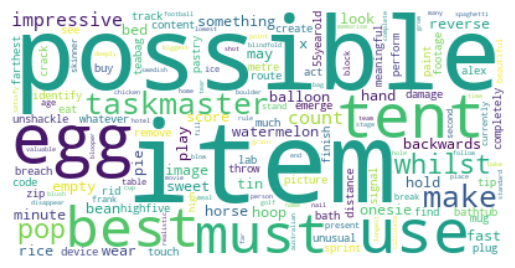

In [66]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()